In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway
from scipy import stats


In [56]:

# Define parameters
num_patients_per_medication = 30
num_medications = 4

# Generate synthetic data for one-way ANOVA
np.random.seed(42)  # for reproducibility
age = np.random.randint(18, 80, size=num_patients_per_medication * num_medications)
gender = np.random.choice(['Male', 'Female'], size=num_patients_per_medication * num_medications)
medication = np.repeat(np.arange(num_medications), num_patients_per_medication)
blood_pressure = np.random.normal(loc=120, scale=5, size=num_patients_per_medication * num_medications)

# Generate synthetic names with corresponding gender
def generate_names(num_names, genders):
    male_first_names = ['John', 'Michael', 'William', 'David', 'Robert']
    female_first_names = ['Emily', 'Olivia', 'Samantha', 'Emma', 'Jane']
    last_names = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown']
    names = []
    for gender in genders:
        if gender == 'Male':
            first_name = np.random.choice(male_first_names)
        else:
            first_name = np.random.choice(female_first_names)
        last_name = np.random.choice(last_names)
        full_name = first_name + ' ' + last_name
        names.append(full_name)
    return names

names = generate_names(num_patients_per_medication * num_medications, gender)

# Create DataFrame for one-way ANOVA data
one_way_data = pd.DataFrame({
    'Name': names,
    'Age': age,
    'Gender': gender,
    'Medication': medication,
    'BloodPressure': blood_pressure
})


one_way_data.to_csv('Blood Pressure.csv', index=False)

print("CSV file generated successfully.")


CSV file generated successfully.


In [57]:
df1=pd.read_csv("Blood Pressure.csv")
df1.head()

,Name,Age,Gender,Medication,BloodPressure
0,Olivia Smith,56,Female,0,118.709076
1,Emily Smith,69,Female,0,122.304778
2,William Brown,46,Male,0,113.253050
3,Olivia Johnson,32,Female,0,114.904636
4,Samantha Johnson,60,Female,0,120.635061


In [58]:
df1.describe(include='all')

,Name,Age,Gender,Medication,BloodPressure
count,120,120.000000,120,120.000000,120.000000
unique,47,NaN,2,NaN,NaN
top,John Jones,NaN,Male,NaN,NaN
freq,6,NaN,69,NaN,NaN
mean,NaN,50.391667,NaN,1.500000,119.868316
std,NaN,19.089922,NaN,1.122722,5.250707
min,NaN,19.000000,NaN,0.000000,105.602716
25%,NaN,33.750000,NaN,0.750000,116.152301
50%,NaN,51.500000,NaN,1.500000,119.959249
75%,NaN,68.000000,NaN,2.250000,123.437108


In [59]:
df1.nunique()

Name              47
Age               55
Gender             2
Medication         4
BloodPressure    120
dtype: int64


# 2. Univariate Analysis
# Histogram of Age

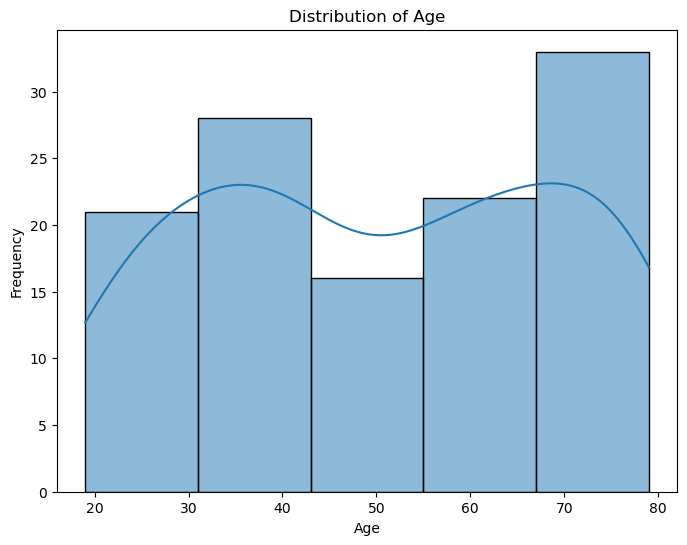

In [60]:

# 2. Univariate Analysis
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df1['Age'], bins=5, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [61]:
skewness = stats.skew(df1['BloodPressure'])
kurtosis = stats.kurtosis(df1['BloodPressure'])
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)


Skewness: -0.17629202968540122
Kurtosis: -0.16435524578493865


In [62]:
shapiro_test = stats.shapiro(df1['BloodPressure'])
print("\nShapiro-Wilk Test for Normality:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)


Shapiro-Wilk Test for Normality:
Test Statistic: 0.9933999180793762
p-value: 0.8454365730285645


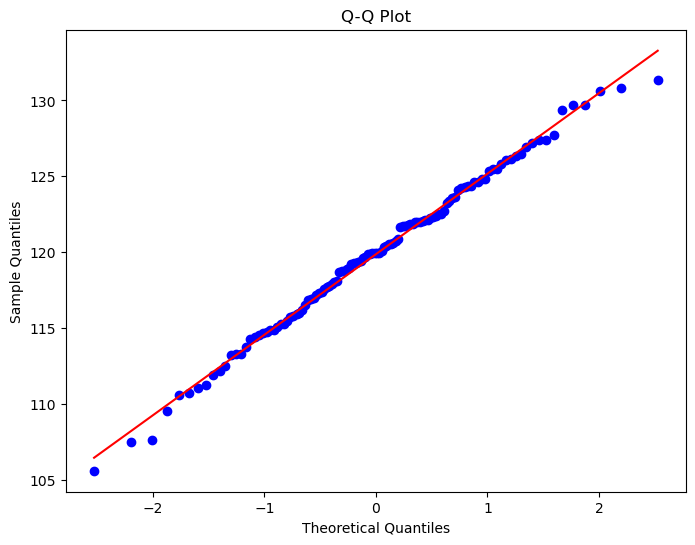

In [63]:
# QQ plot for normality
plt.figure(figsize=(8, 6))
stats.probplot(df1['BloodPressure'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [64]:
# From the test and Graph analysis the distribution is normally distributed

In [65]:
#Bivariate analaysis

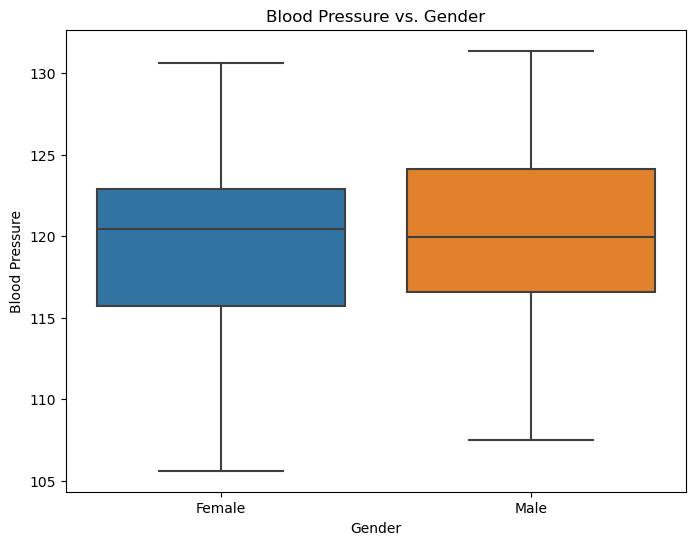

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='BloodPressure', data=df1)
plt.title('Blood Pressure vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Blood Pressure')
plt.show()

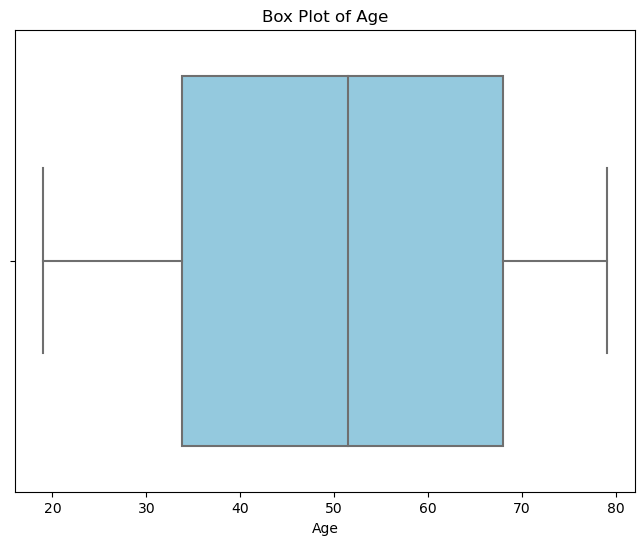

In [67]:
# Box plot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=df1, color='skyblue')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


In [68]:
#Hypothesis Testing using ANOVA
#Null Hypothesis (H0): The mean blood pressure is the same across all medication groups.
#Alternative Hypothesis (H1): At least one medication group has a different mean blood pressure from the others

In [69]:
# One-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANOVA model
model = ols('BloodPressure ~ Medication', data=df1).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nOne-Way ANOVA Results:")
print(anova_table)


One-Way ANOVA Results:
                 sum_sq     df         F    PR(>F)
Medication     6.760910    1.0  0.243669  0.622486
Residual    3274.060099  118.0       NaN       NaN


In [70]:
# Significance level
alpha = 0.05

# Check if p-value is less than alpha
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis (H0).")
    print("There is a significant difference in the mean blood pressure levels among different medication groups.")
else:
    print("Fail to reject the null hypothesis (H0).")
    print("There is no significant difference in the mean blood pressure levels among different medication groups.")


Fail to reject the null hypothesis (H0).
There is no significant difference in the mean blood pressure levels among different medication groups.
